<a href="https://colab.research.google.com/github/Anirudh1905/Heart_Disease_Prediction/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Heart Disease Prediction**

###**Importing Data**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


###**Feature Selection**

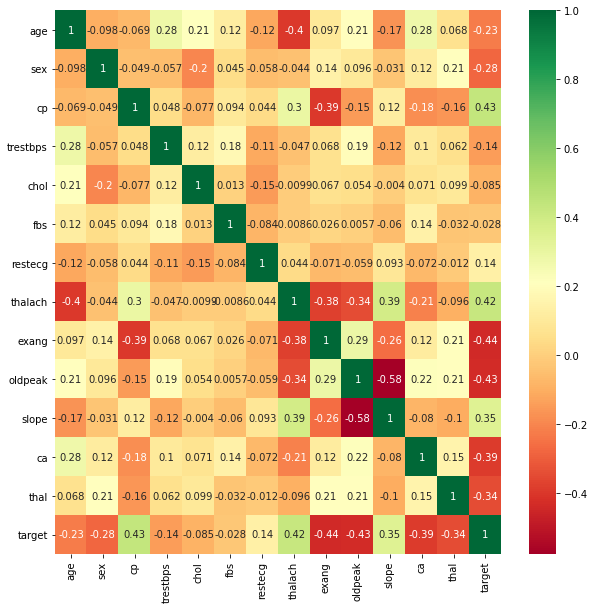

In [6]:
import seaborn as sns
c=df.corr()
top_cor=c.index
plt.figure(figsize=(10,10))
sns.heatmap(c,annot=True,cmap="RdYlGn")

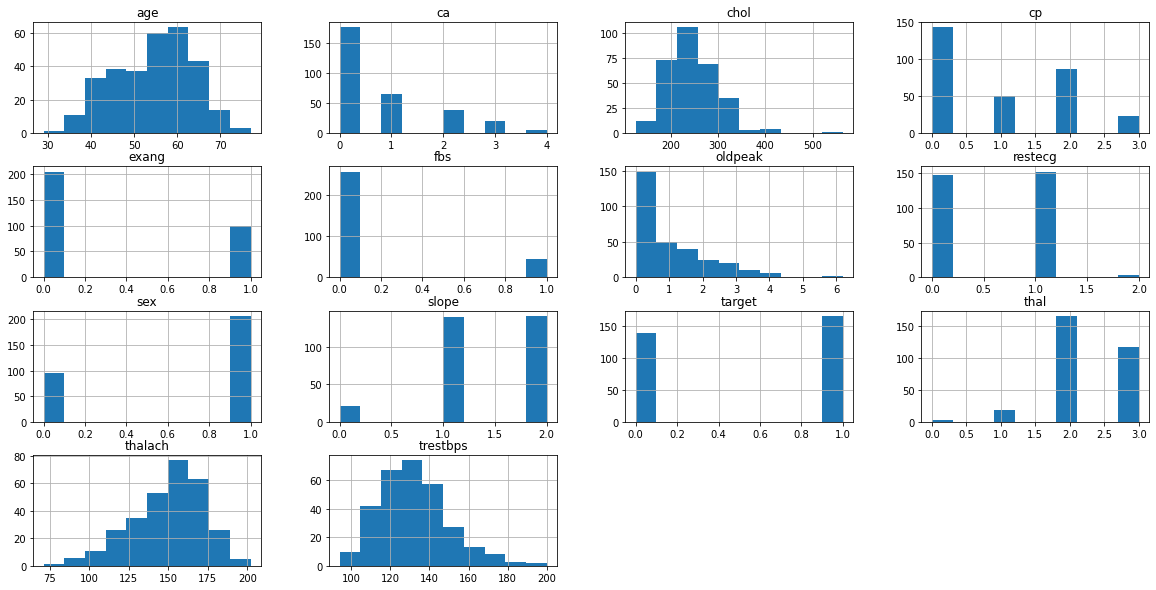

In [7]:
df.hist(figsize=(20,10))
plt.show()

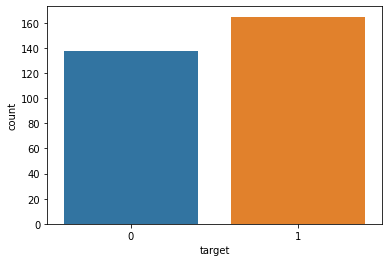

In [8]:
sns.countplot(x='target',data=df)

###**Data Processing**

In [10]:
ds=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
cs=['age','trestbps','chol','thalach','oldpeak']
ds[cs]=st.fit_transform(ds[cs])

In [12]:
ds.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0


In [13]:
y=ds['target']
x=ds.drop(['target'],axis=1)

###**KNN**

In [46]:
from sklearn.model_selection import cross_val_score
kn_scores=[]
for k in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=k)
  score=cross_val_score(knn,x,y,cv=10)
  kn_scores.append(score.mean())

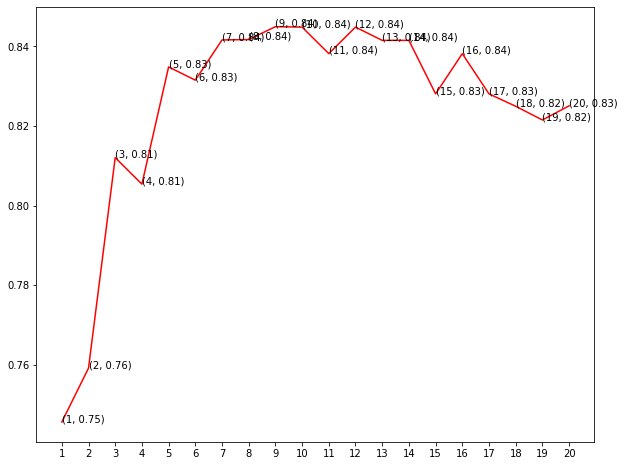

In [47]:
plt.figure(figsize=(10,8))
plt.plot([k for k in range(1,21)],kn_scores,'r')
for i in range(1,21):
  plt.text(i,kn_scores[i-1],(i,round(kn_scores[i-1],2)))
plt.xticks([i for i in range(1,21)])
plt.show()

In [49]:
knn=KNeighborsClassifier(n_neighbors=10)
sc=cross_val_score(knn,x,y,cv=10)
sc.mean()

0.8448387096774193

###**Random Forest**

In [97]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,x,y,cv=10)

In [98]:
score.mean()

0.801505376344086

###**Decision Tree Classifier**

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

lvls=21
mean=np.zeros((lvls-1))

for i in range(1,lvls):
  t=DecisionTreeClassifier(criterion='entropy',max_depth=i).fit(x_train,y_train)
  y_hat=t.predict(x_test)
  mean[i-1]=accuracy_score(y_test,y_hat)

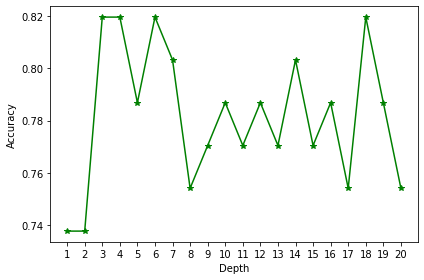

In [109]:
plt.plot(range(1,lvls),mean,'g',marker='*')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.xticks([i for i in range(1,21)])
plt.show()

In [111]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [112]:
y_pre=dtree.predict(x_test)
y_pre_train=dtree.predict(x_train)
print("DecisionTrees's Training Accuracy: %.2f"%accuracy_score(y_train,y_pre_train))
print("DecisionTrees's Testing Accuracy: ", accuracy_score(y_test,y_pre))

DecisionTrees's Training Accuracy: 0.88
DecisionTrees's Testing Accuracy:  0.819672131147541


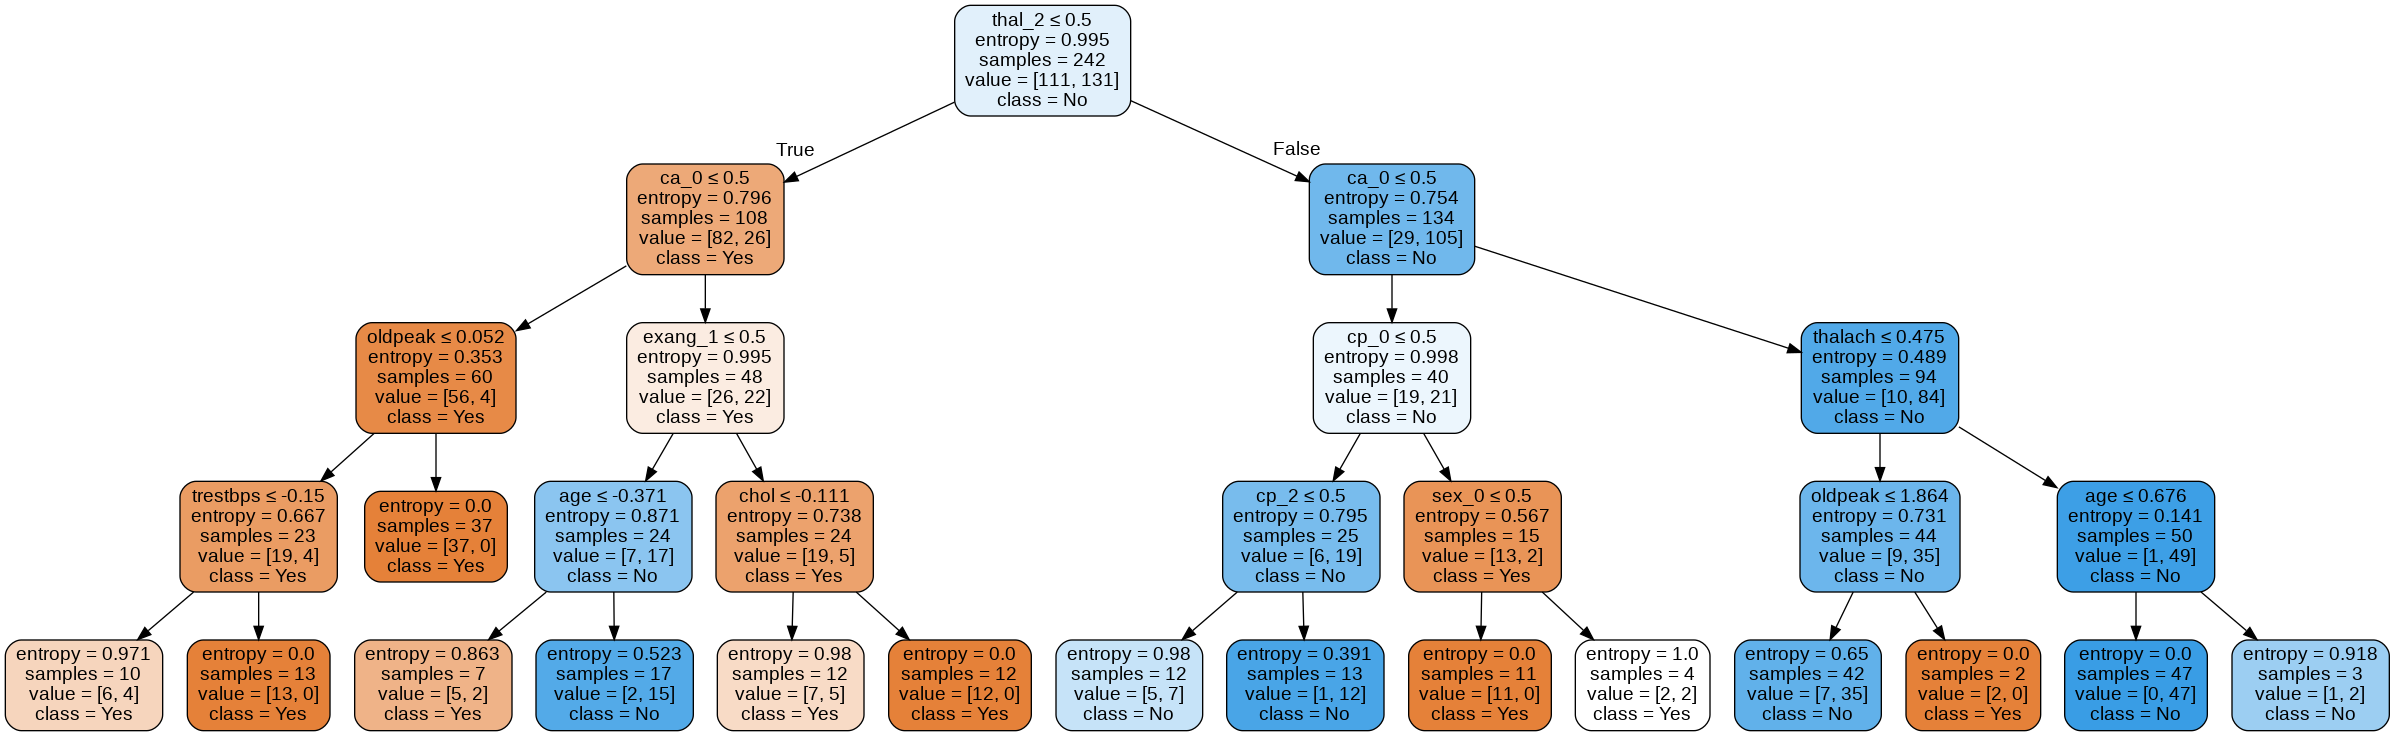

In [123]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dt=list(x.columns)
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=dt,class_names= ['Yes','No'],filled=True,rounded=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())